In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, 
from xgboost import XGBClassifier
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)

In [2]:
#reading data sets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
#train data
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
#test data
df_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [5]:
#shape
df_train.shape, df_test.shape

((31647, 18), (13564, 17))

In [6]:
#Columns
df_train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [7]:
df_test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [8]:
#data types
data_types_train = pd.DataFrame(df_train.dtypes, columns = ['Train'])
data_types_test = pd.DataFrame(df_test.dtypes, columns = ['Test'])
data_types = pd.concat([data_types_train, data_types_test], axis = 1)
data_types

,Train,Test
ID,int64,int64
age,int64,int64
job,object,object
marital,object,object
education,object,object
default,object,object
balance,int64,int64
housing,object,object
loan,object,object
contact,object,object


In [9]:
#missing values
missing_values_train = pd.DataFrame(df_train.isna().sum(), columns = ['Train'])
missing_values_test = pd.DataFrame(df_test.isna().sum(), columns = ['Test'])
missing_values = pd.concat([missing_values_train, missing_values_test], axis = 1)
missing_values

,Train,Test
ID,0,0.0
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
balance,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0


In [10]:
#Subscribers Data
y_df = df_train[df_train['subscribed'] == 'yes']

In [11]:
#Numerical Analysis
df_train[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']].describe()

,age,balance,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
df_test[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']].describe()

,age,balance,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,40.887128,1358.496535,258.278679,2.759510,41.648555,0.594441
std,10.604108,3082.940623,258.488648,3.060928,101.985178,1.998193
min,18.000000,-3313.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,71.000000,102.000000,1.000000,-1.000000,0.000000
50%,39.000000,445.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1413.250000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,98417.000000,3253.000000,58.000000,850.000000,55.000000


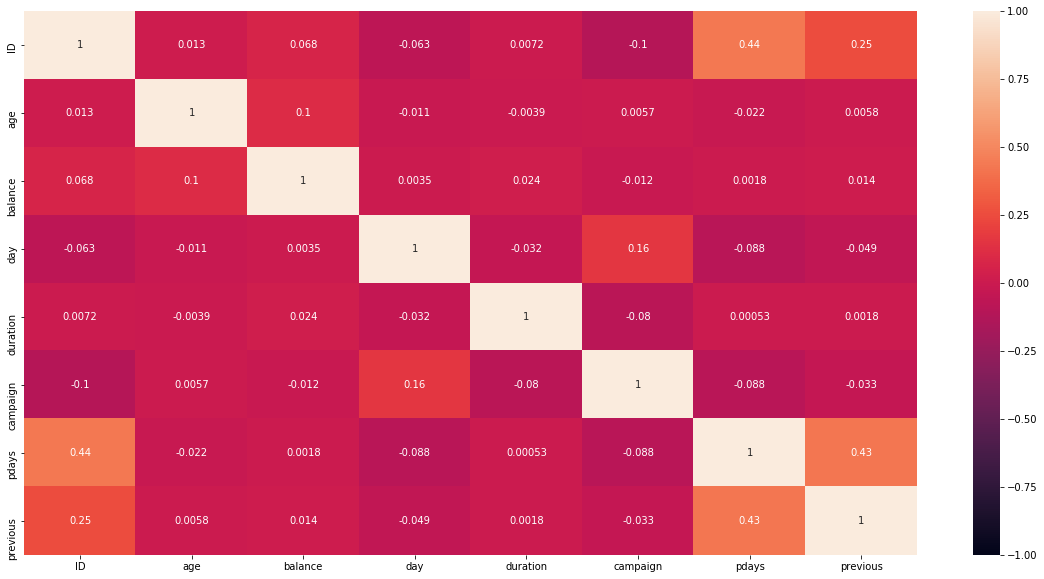

In [13]:
#train data correlation
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(df_train.corr(), vmax = 1, vmin = -1, square = False, annot = True)

Text(0, 0.5, 'Count')

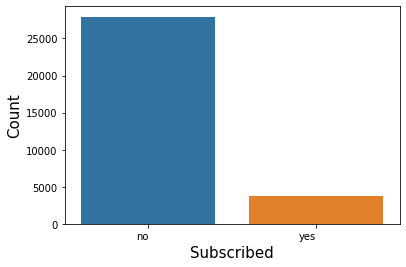

In [14]:
#Subscribed
sns.countplot(x = 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Subscribed', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

#12% of customers have subscribed to term deposit.

In [15]:
#bining of age for analysis
age_group_train = []
for i in df_train['age']:
    if (i >= 18 and i <= 25):
        age_group_train.append('18-25')
    elif (i >= 26 and i <= 33):
        age_group_train.append('26-33')
    elif (i >= 34 and i <= 41):
        age_group_train.append('34-41')
    elif (i >= 42 and i <= 49):
        age_group_train.append('42-49')
    elif (i >= 50 and i <= 57):
        age_group_train.append('50-57')
    elif (i >= 58 and i <= 65):
        age_group_train.append('58-65')
    elif (i >= 66 and i <= 73):
        age_group_train.append('66-73')
    elif (i >= 74 and i <= 81):
        age_group_train.append('74-81')
    elif (i >= 82 and i <= 89):
        age_group_train.append('82-89')
    elif (i >= 90 and i <= 97):
        age_group_train.append('90-97')
    else:
        pass
df_train['age_group'] = age_group_train

In [16]:
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,age_group
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no,50-57
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no,26-33
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no,26-33
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes,50-57
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no,26-33


In [17]:
age_group_test = []
for i in df_test['age']:
    if (i >= 18 and i <= 25):
        age_group_test.append('18-25')
    elif (i >= 26 and i <= 33):
        age_group_test.append('26-33')
    elif (i >= 34 and i <= 41):
        age_group_test.append('34-41')
    elif (i >= 42 and i <= 49):
        age_group_test.append('42-49')
    elif (i >= 50 and i <= 57):
        age_group_test.append('50-57')
    elif (i >= 58 and i <= 65):
        age_group_test.append('58-65')
    elif (i >= 66 and i <= 73):
        age_group_test.append('66-73')
    elif (i >= 74 and i <= 81):
        age_group_test.append('74-81')
    elif (i >= 82 and i <= 89):
        age_group_test.append('82-89')
    elif (i >= 90 and i <= 97):
        age_group_test.append('90-97')
    else:
        pass
df_test['age_group'] = age_group_test

In [18]:
df_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,age_group
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown,26-33
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown,74-81
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown,26-33
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown,50-57
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown,42-49


Text(0, 0.5, 'Count')

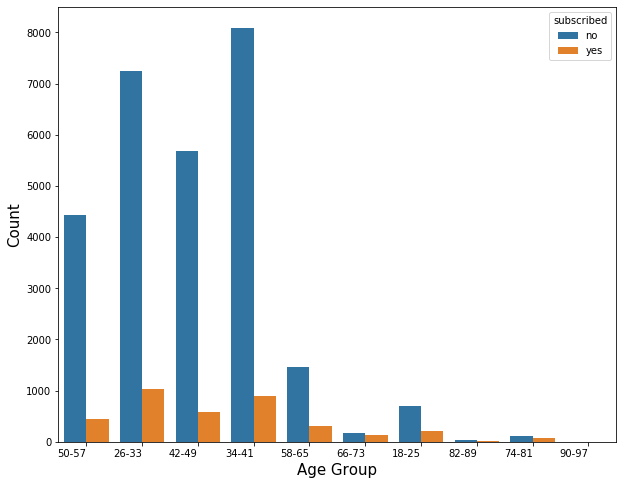

In [19]:
#age group vs subscribe
plt.figure(figsize = (10, 8))
sns.countplot(x ='age_group', hue = 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Age Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

#28% of subscribers are between 26-33 years of age.
#52% of subscribers are between 26-41 years of age.
#68% of subscribers are between 26-49 years of age.
#80% of subscribers are between 26-57 years of age.

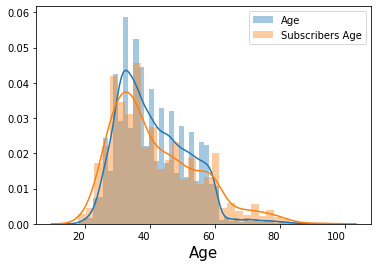

In [20]:
#Distribution of Age
y_df = df_train[df_train['subscribed'] == 'yes']
sns.distplot(df_train['age'])
sns.distplot(y_df['age'])
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Age', fontsize = 15)
plt.legend(['Age', 'Subscribers Age'])
plt.show()

Text(0, 0.5, 'Count')

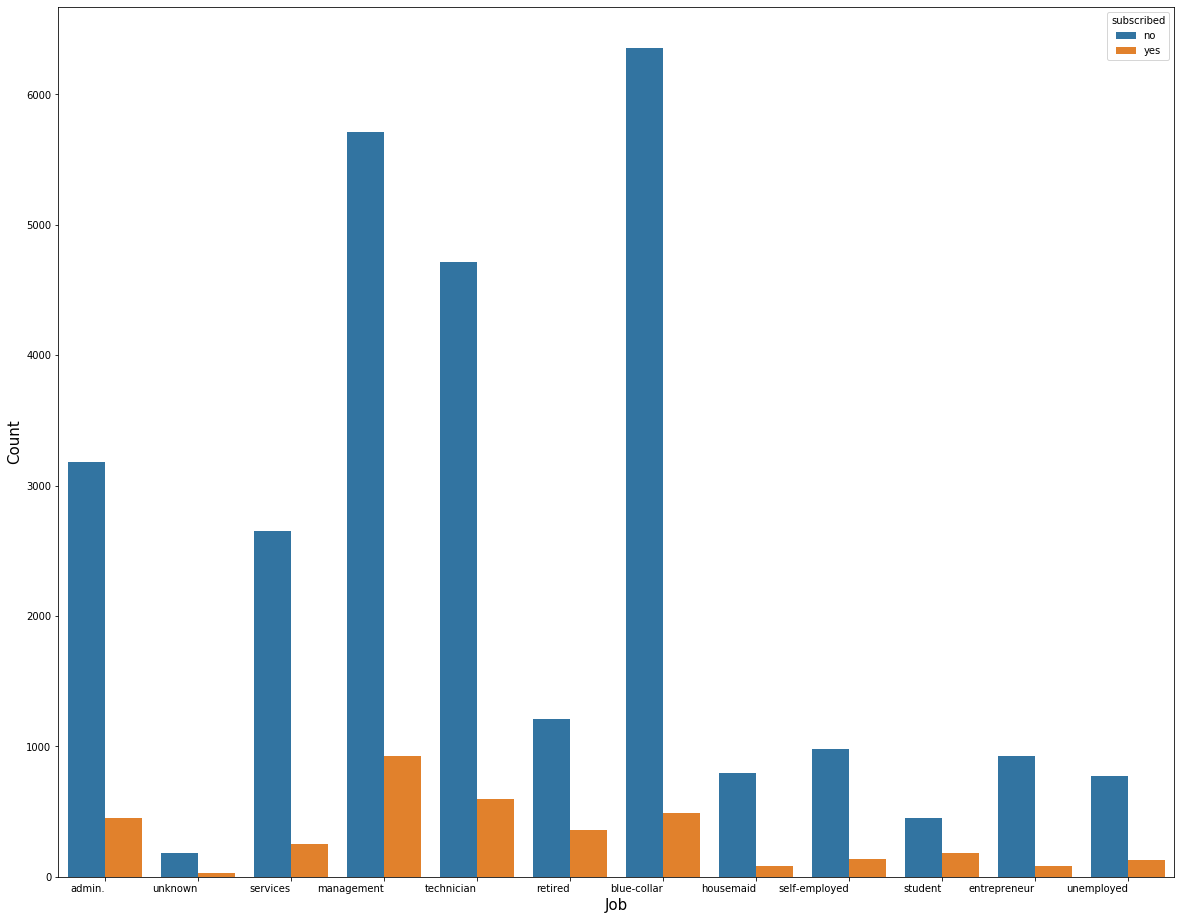

In [21]:
#job vs subscribers
plt.figure(figsize = (20, 16))
sns.countplot(x ='job', hue = 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Job', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

#25% of subscribers have management job.
#41% of subscribers have management and technician jobs.
#54% of subscribers have management, technician and blue-collar jobs.
#66% of subscribers have management, technician, blue-collar and admin jobs.
#76% of subscribers have either management, technician, blue-collar and admin jobs or are retired.

Text(0, 0.5, 'Count')

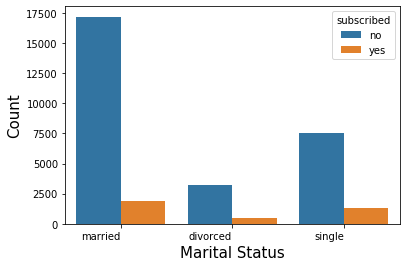

In [22]:
#marital status vs subscribers
sns.countplot(x ='marital', hue = 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Marital Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

#52% of subscribers are married.
#88% of subscribers are either married or single.

Text(0, 0.5, 'Count')

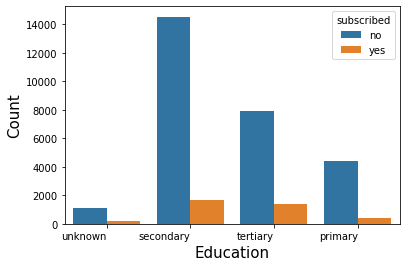

In [23]:
#education vs subscribers
sns.countplot(x ='education', hue = 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Education', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

#46% of subscribers have secondary education.
#84% of subscribers have secondary and tertiary education.

Text(0, 0.5, 'Count')

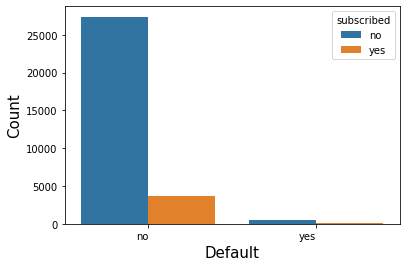

In [24]:
#default vs subscribers
sns.countplot(x ='default', hue = 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Default', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

#99% of subscribers are non-defaulters.

In [25]:
#bining of balance for analysis
balance_train = []
for i in df_train['balance']:
    if (i >= -14999 and i <= 0):
        balance_train.append('Negative Balance')
    elif (i >= 1 and i <= 15000):
        balance_train.append('0K - 15K')
    elif (i >= 15001 and i <= 30000):
        balance_train.append('15K - 30K')
    elif (i >= 30001 and i <= 45000):
        balance_train.append('30K - 45K')
    elif (i >= 45001 and i <= 60000):
        balance_train.append('45K - 60K')
    elif (i >= 60001 and i <= 75000):
        balance_train.append('60K - 75K')
    elif (i >= 75001 and i <= 90000):
        balance_train.append('75K - 90K')
    elif (i >= 90001 and i <= 105000):
        balance_train.append('90K - 105K')
    else:
        pass
df_train['balance_group'] = balance_train

In [26]:
balance_test = []
for i in df_test['balance']:
    if (i >= -14999 and i <= 0):
        balance_test.append('Negative Balance')
    elif (i >= 1 and i <= 15000):
        balance_test.append('0K - 15K')
    elif (i >= 15001 and i <= 30000):
        balance_test.append('15K - 30K')
    elif (i >= 30001 and i <= 45000):
        balance_test.append('30K - 45K')
    elif (i >= 45001 and i <= 60000):
        balance_test.append('45K - 60K')
    elif (i >= 60001 and i <= 75000):
        balance_test.append('60K - 75K')
    elif (i >= 75001 and i <= 90000):
        balance_test.append('75K - 90K')
    elif (i >= 90001 and i <= 105000):
        balance_test.append('90K - 105K')
    else:
        pass
df_test['balance_group'] = balance_test

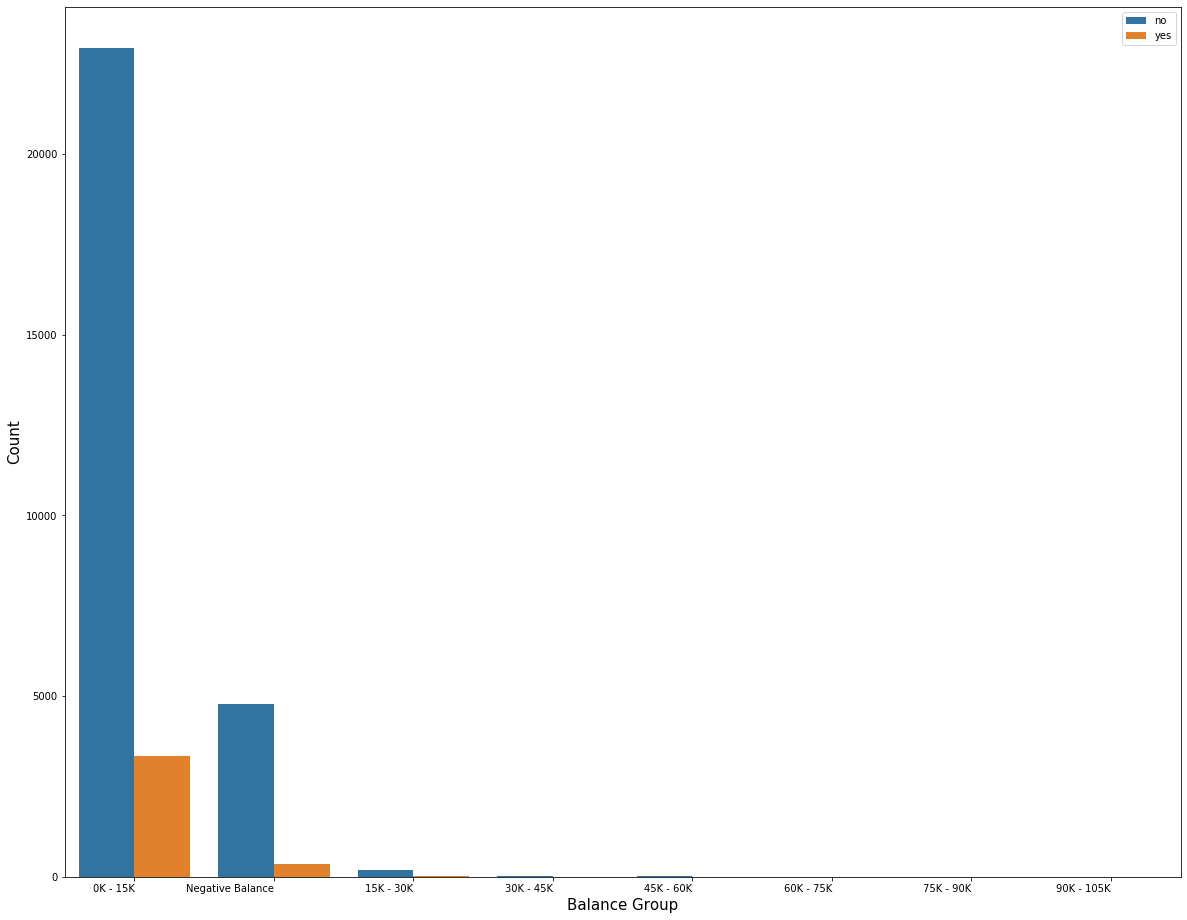

In [27]:
#balance group vs subscribe
plt.figure(figsize = (20, 16))
sns.countplot(x ='balance_group', hue = 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Balance Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend(loc = 'upper right')

#90% of the subscribers have balance between 0-15K.

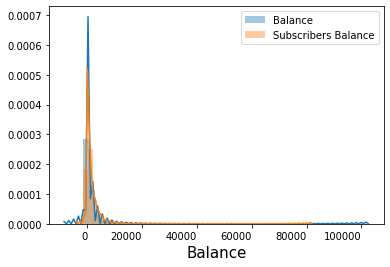

In [28]:
#Balance Distribution
sns.distplot(df_train['balance'])
sns.distplot(y_df['balance'])
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Balance', fontsize = 15)
plt.legend(['Balance', 'Subscribers Balance'])
plt.show()

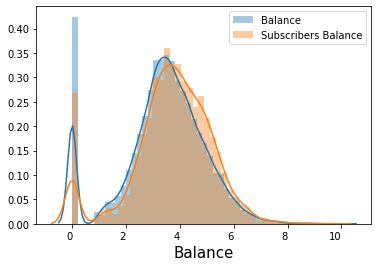

In [29]:
#transforming Balance
sns.distplot((df_train['balance']) ** (1/5))
sns.distplot((y_df['balance']) ** (1/5))
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Balance', fontsize = 15)
plt.legend(['Balance', 'Subscribers Balance'])
plt.show()
df_train['balance'] = df_train['balance'] ** (1/5)
df_test['balance'] = df_test['balance'] ** (1/5)

In [30]:
df_train['balance'] = df_train['balance'].fillna(df_train['balance'].mean())
df_test['balance'] = df_test['balance'].fillna(df_test['balance'].mean())

Text(0, 0.5, 'Count')

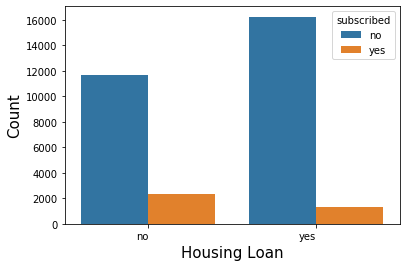

In [31]:
#housing vs subscribers
sns.countplot(x ='housing', hue = 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Housing Loan', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

#64% of subscribers don't have housing loan.

Text(0, 0.5, 'Count')

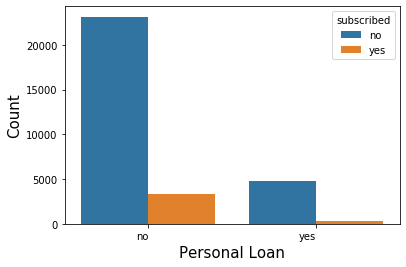

In [32]:
#loan vs subscribers
sns.countplot(x ='loan', hue = 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Personal Loan', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

#91% of subscribers don't have personal loan.

Text(0, 0.5, 'Count')

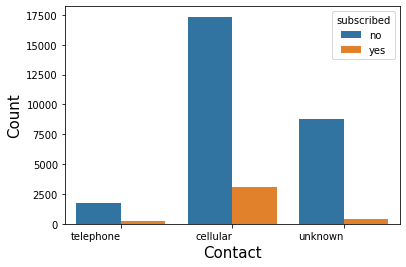

In [33]:
#contact vs subscribers
sns.countplot(x ='contact', hue = 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Contact', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

#83% of subscribers were contacted over cellular network.

In [34]:
#day to week
week = []
for i in df_train['day']:
    if i < 8:
        week.append(1)
    elif i >= 8 and i < 16:
        week.append(2)
    elif i >=16 and i < 22:
        week.append(3)
    else:
        week.append(4)
df_train['week'] = week
df_train = df_train.drop('day', axis = 1)

In [35]:
week = []
for i in df_test['day']:
    if i < 8:
        week.append(1)
    elif i >= 8 and i < 16:
        week.append(2)
    elif i >=16 and i < 22:
        week.append(3)
    else:
        week.append(4)
df_test['week'] = week
df_test = df_test.drop('day', axis = 1)

Text(0, 0.5, 'Count')

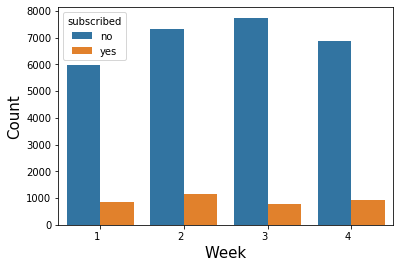

In [36]:
#week vs subscribed
sns.countplot(x ='week', hue = 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Week', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

#31% of subscribers are contacted in the second week of the month.
#54% of subscribers are contacted in the first half of the month.

Text(0, 0.5, 'Count')

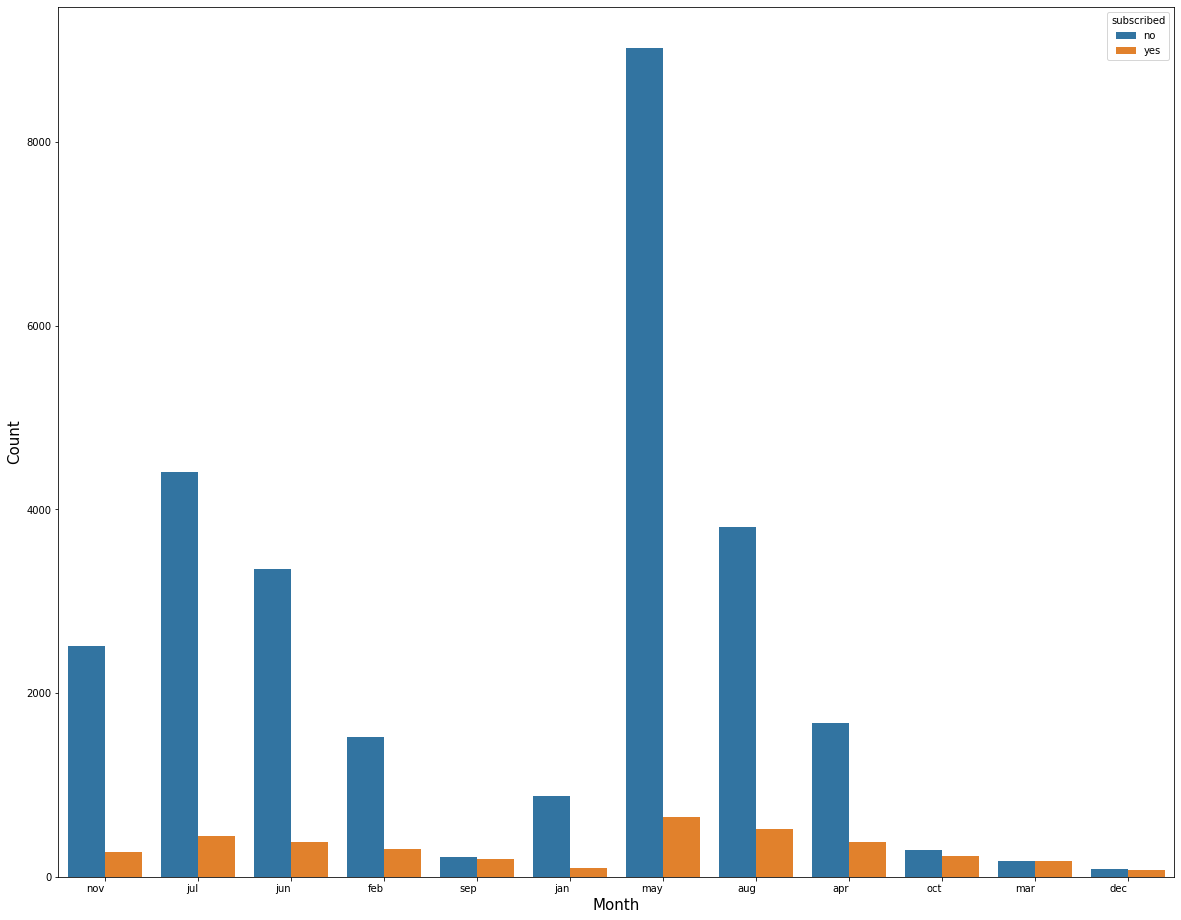

In [37]:
#month vs subscribed
plt.figure(figsize = (20, 16))
sns.countplot(x ='month', hue = 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

#18% of subscribers are contacted in may.
#64% of subscribers are contacted inbetween april to august.
#54% of subscribers are contacted in the first half of the year.

In [38]:
#bining of duration for analysis
duration = []
for i in df_train['duration']:
    if (i >= 0 and i <= 500):
        duration.append('0-500')
    elif (i >= 501 and i <= 1000):
        duration.append('501-1000')
    elif (i >= 1001 and i <= 1500):
        duration.append('1001-1500')
    elif (i >= 1501 and i <= 2000):
        duration.append('1501-2000')
    elif (i >= 2001 and i <= 2500):
        duration.append('2001 - 2500')
    elif (i >= 2501 and i <= 3000):
        duration.append('2501-3000')
    elif (i >= 3001 and i <= 3500):
        duration.append('3001-3500')
    elif (i >= 3501 and i <= 4000):
        duration.append('3501-4000')
    elif (i >= 4001 and i <= 4500):
        duration.append('4001-4500')
    elif (i >= 4501 and i <= 5000):
        duration.append('4501-5000')
    else:
        pass
df_train['duration_group'] = duration

In [39]:
duration = []
for i in df_test['duration']:
    if (i >= 0 and i <= 500):
        duration.append('0-500')
    elif (i >= 501 and i <= 1000):
        duration.append('501-1000')
    elif (i >= 1001 and i <= 1500):
        duration.append('1001-1500')
    elif (i >= 1501 and i <= 2000):
        duration.append('1501-2000')
    elif (i >= 2001 and i <= 2500):
        duration.append('2001 - 2500')
    elif (i >= 2501 and i <= 3000):
        duration.append('2501-3000')
    elif (i >= 3001 and i <= 3500):
        duration.append('3001-3500')
    elif (i >= 3501 and i <= 4000):
        duration.append('3501-4000')
    elif (i >= 4001 and i <= 4500):
        duration.append('4001-4500')
    elif (i >= 4501 and i <= 5000):
        duration.append('4501-5000')
    else:
        pass
df_test['duration_group'] = duration

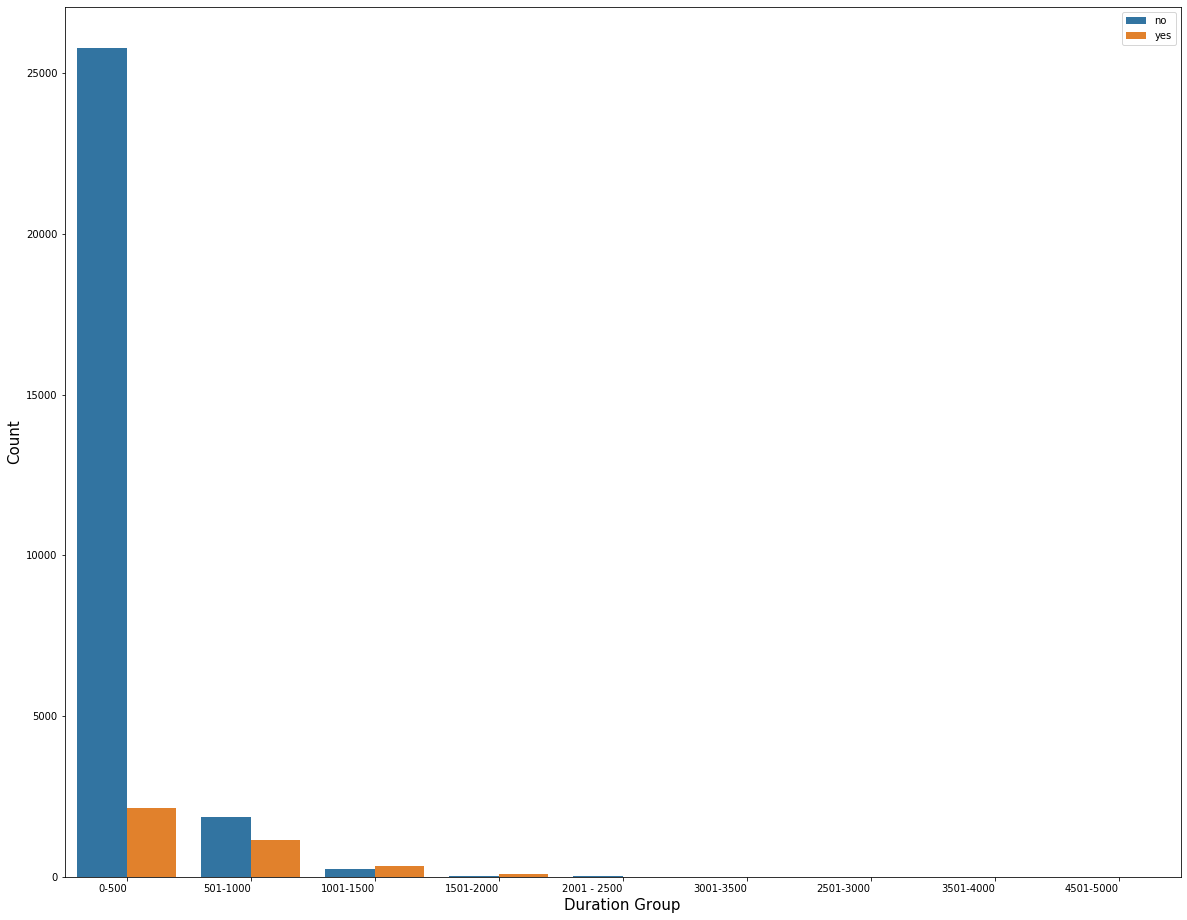

In [40]:
#duration group vs subscribe
plt.figure(figsize = (20, 16))
sns.countplot(x ='duration_group', hue = 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Duration Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend(loc = 'upper right')

#57% of the subscribers have contact duration of less than 500 seconds.
#88% of the subscribers have contact duration of less than 1000 seconds.

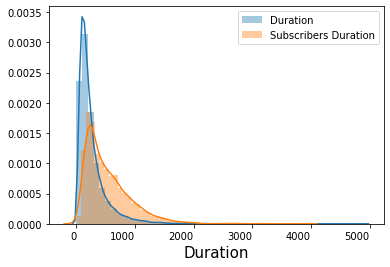

In [41]:
#Analysing Duration
sns.distplot(df_train['duration'])
sns.distplot(y_df['duration'])
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Duration', fontsize = 15)
plt.legend(['Duration', 'Subscribers Duration'])
plt.show()

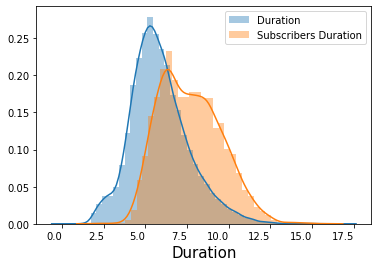

In [42]:
#transforming duration
sns.distplot((df_train['duration']) ** (1/3))
sns.distplot((y_df['duration']) ** (1/3))
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Duration', fontsize = 15)
plt.legend(['Duration', 'Subscribers Duration'])
plt.show()
df_train['duration'] = df_train['duration'] ** (1/3)
df_test['duration'] = df_test['duration'] ** (1/3)

In [43]:
#bining of campaign
campaign_train = []
for i in df_train['campaign']:
    if (i >= 1 and i <= 7):
        campaign_train.append('1-7')
    elif (i >= 8 and i <= 14):
        campaign_train.append('8-14')
    elif (i >= 15 and i <= 21):
        campaign_train.append('15-21')
    elif (i >= 22 and i <= 28):
        campaign_train.append('22-28')
    elif (i >= 29 and i <= 35):
        campaign_train.append('29-35')
    elif (i >= 36 and i <= 42):
        campaign_train.append('36-42')
    elif (i >= 43 and i <= 49):
        campaign_train.append('43-49')
    elif (i >= 50 and i <= 56):
        campaign_train.append('50-56')
    elif (i >= 57 and i <= 63):
        campaign_train.append('57-63')
    else:
        pass
df_train['campaign_group'] = campaign_train

In [44]:
campaign_test = []
for i in df_test['campaign']:
    if (i >= 1 and i <= 7):
        campaign_test.append('1-7')
    elif (i >= 8 and i <= 14):
        campaign_test.append('8-14')
    elif (i >= 15 and i <= 21):
        campaign_test.append('15-21')
    elif (i >= 22 and i <= 28):
        campaign_test.append('22-28')
    elif (i >= 29 and i <= 35):
        campaign_test.append('29-35')
    elif (i >= 36 and i <= 42):
        campaign_test.append('36-42')
    elif (i >= 43 and i <= 49):
        campaign_test.append('43-49')
    elif (i >= 50 and i <= 56):
        campaign_test.append('50-56')
    elif (i >= 57 and i <= 63):
        campaign_test.append('57-63')
    else:
        pass
df_test['campaign_group'] = campaign_test

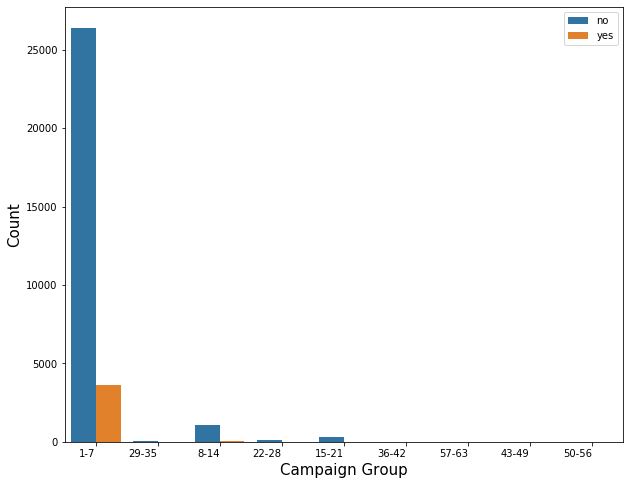

In [45]:
#campaign group vs subscriber
plt.figure(figsize = (10, 8))
sns.countplot(x ='campaign_group', hue= 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Campaign Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend(loc = 'upper right')

#98% of subscribers have been contacted maximum 7 times.

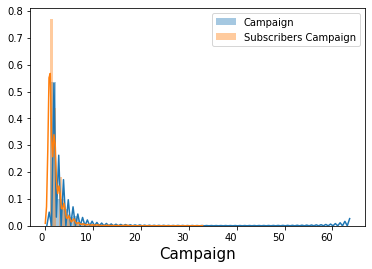

In [46]:
#campaign distribution
sns.distplot(df_train['campaign'])
sns.distplot(y_df['campaign'])
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Campaign', fontsize = 15)
plt.legend(['Campaign', 'Subscribers Campaign'])
plt.show()

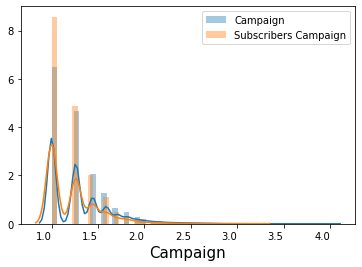

In [47]:
#transforming campaign
sns.distplot((df_train['campaign']) ** (1/3))
sns.distplot((y_df['campaign']) ** (1/3))
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Campaign', fontsize = 15)
plt.legend(['Campaign', 'Subscribers Campaign'])
plt.show()
df_train['campaign'] = df_train['campaign'] ** (1/3)
df_test['campaign'] = df_test['campaign'] ** (1/3)

In [48]:
#Changing -1 in pdays to 0
pdays = []
for i in df_train['pdays']:
    if i < 0:
        pdays.append(0)
    else:
        pdays.append(i)
df_train['pdays'] = pdays

In [49]:
pdays = []
for i in df_test['pdays']:
    if i < 0:
        pdays.append(0)
    else:
        pdays.append(i)
df_test['pdays'] = pdays

In [50]:
#binning of pdays
pdays = []
for i in df_train['pdays']:
    if (i >= 0 and i <= 100):
        pdays.append('1-100')
    elif (i >= 101 and i <= 200):
        pdays.append('101-200')
    elif (i >= 201 and i <= 300):
        pdays.append('201-300')
    elif (i >= 301 and i <= 400):
        pdays.append('301-400')
    elif (i >= 401 and i <= 500):
        pdays.append('401-500')
    elif (i >= 501 and i <= 600):
        pdays.append('501-600')
    elif (i >= 601 and i <= 700):
        pdays.append('601-700')
    elif (i >= 701 and i <= 800):
        pdays.append('701-800')
    elif (i >= 801 and i <= 900):
        pdays.append('801-900')
    else:
        pass
df_train['pdays_group'] = pdays

In [51]:
pdays = []
for i in df_test['pdays']:
    if (i >= 0 and i <= 100):
        pdays.append('1-100')
    elif (i >= 101 and i <= 200):
        pdays.append('101-200')
    elif (i >= 201 and i <= 300):
        pdays.append('201-300')
    elif (i >= 301 and i <= 400):
        pdays.append('301-400')
    elif (i >= 401 and i <= 500):
        pdays.append('401-500')
    elif (i >= 501 and i <= 600):
        pdays.append('501-600')
    elif (i >= 601 and i <= 700):
        pdays.append('601-700')
    elif (i >= 701 and i <= 800):
        pdays.append('701-800')
    elif (i >= 801 and i <= 900):
        pdays.append('801-900')
    else:
        pass
df_test['pdays_group'] = pdays

Text(0, 0.5, 'Count')

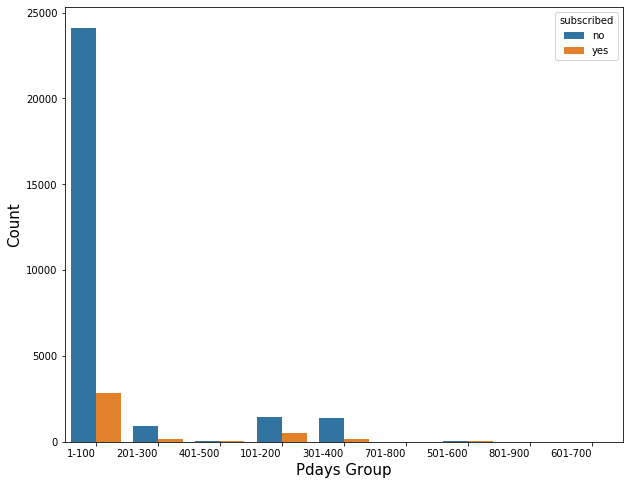

In [52]:
#pdays vs subscribed
plt.figure(figsize = (10, 8))
sns.countplot(x ='pdays_group', hue= 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Pdays Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

#76% of subscribers have been previously contacted within 100 days.
#90% of subscribers have been previously contacted within 200 days.

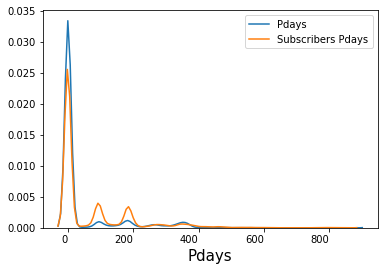

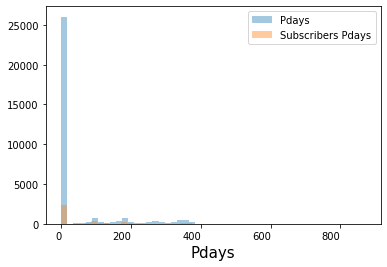

In [53]:
#pdays distribution
sns.kdeplot(df_train['pdays'], bw = 10)
sns.kdeplot(y_df['pdays'], bw = 10)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Pdays', fontsize = 15)
plt.legend(['Pdays', 'Subscribers Pdays'])
plt.show()
sns.distplot(df_train['pdays'], kde = False)
sns.distplot(y_df['pdays'], kde = False)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Pdays', fontsize = 15)
plt.legend(['Pdays', 'Subscribers Pdays'])
plt.show()

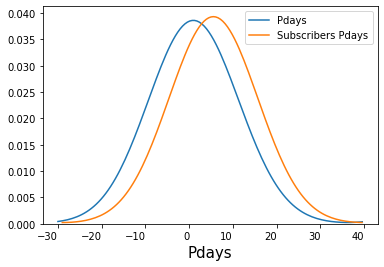

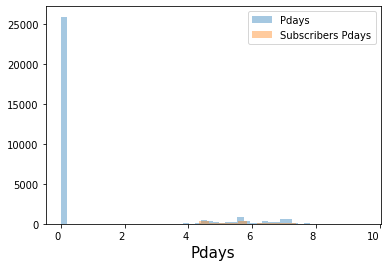

In [54]:
#transforming pdays
sns.kdeplot((df_train['pdays']) ** (1/3), bw = 10)
sns.kdeplot((y_df['pdays']) ** (1/3), bw = 10)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Pdays', fontsize = 15)
plt.legend(['Pdays', 'Subscribers Pdays'])
plt.show()
sns.distplot((df_train['pdays']) ** (1/3), kde = False)
sns.distplot((y_df['pdays']) ** (1/3), kde = False)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Pdays', fontsize = 15)
plt.legend(['Pdays', 'Subscribers Pdays'])
plt.show()
df_train['pdays'] = df_train['pdays'] ** (1/3)
df_test['pdays'] = df_test['pdays'] ** (1/3)

In [55]:
#binning of previous
previous = []
for i in df_train['previous']:
    if (i >= 0 and i <= 50):
        previous.append('1-50')
    elif (i >= 51 and i <= 100):
        previous.append('51-100')
    elif (i >= 101 and i <= 150):
        previous.append('101-150')
    elif (i >= 151 and i <= 200):
        previous.append('151-200')
    elif (i >= 201 and i <= 250):
        previous.append('201-250')
    elif (i >= 251 and i <= 300):
        previous.append('251-300')
    else:
        pass
df_train['previous_groups'] = previous

In [56]:
previous = []
for i in df_test['previous']:
    if (i >= 0 and i <= 50):
        previous.append('1-50')
    elif (i >= 51 and i <= 100):
        previous.append('51-100')
    elif (i >= 101 and i <= 150):
        previous.append('101-150')
    elif (i >= 151 and i <= 200):
        previous.append('151-200')
    elif (i >= 201 and i <= 250):
        previous.append('201-250')
    elif (i >= 251 and i <= 300):
        previous.append('251-300')
    else:
        pass
df_test['previous_groups'] = previous

Text(0, 0.5, 'Count')

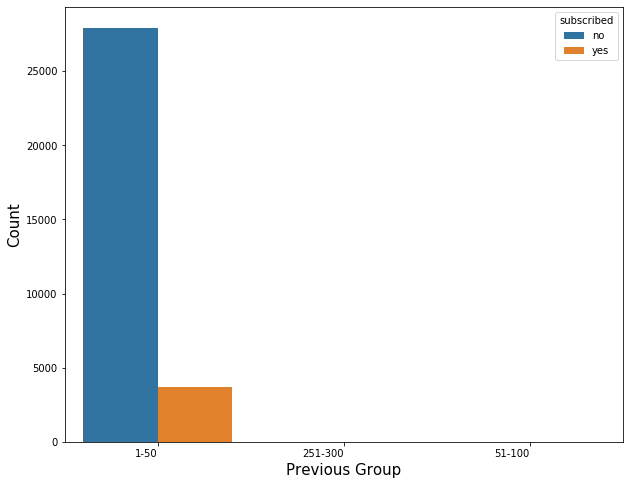

In [57]:
#previous vs subscribed
plt.figure(figsize = (10, 8))
sns.countplot(x ='previous_groups', hue= 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Previous Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

#Almost all the subscribers were contacted 50 or less than 50 times previously.

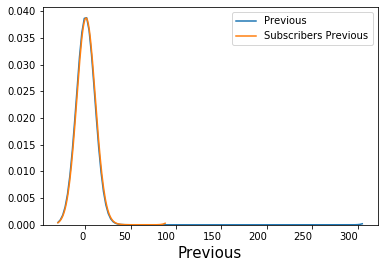

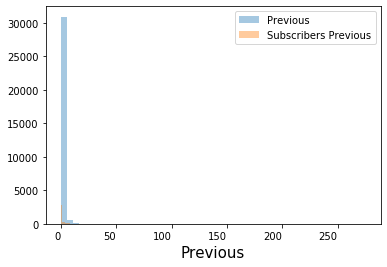

In [58]:
#previous distribution
sns.kdeplot(df_train['previous'], bw = 10)
sns.kdeplot(y_df['previous'], bw = 10)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Previous', fontsize = 15)
plt.legend(['Previous', 'Subscribers Previous'])
plt.show()
sns.distplot(df_train['previous'], kde = False)
sns.distplot(y_df['previous'], kde = False)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Previous', fontsize = 15)
plt.legend(['Previous', 'Subscribers Previous'])
plt.show()

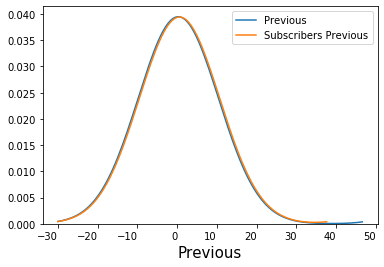

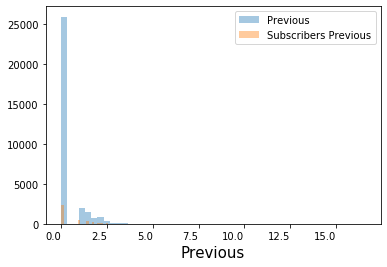

In [59]:
#transforming previous
sns.kdeplot((df_train['previous']) ** (1/2), bw = 10)
sns.kdeplot((y_df['previous']) ** (1/2), bw = 10)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Previous', fontsize = 15)
plt.legend(['Previous', 'Subscribers Previous'])
plt.show()
sns.distplot((df_train['previous']) ** (1/2), kde = False)
sns.distplot((y_df['previous']) ** (1/2), kde = False)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Previous', fontsize = 15)
plt.legend(['Previous', 'Subscribers Previous'])
plt.show()
df_train['previous'] = df_train['previous'] ** (1/2)
df_test['previous'] = df_test['previous'] ** (1/2)

Text(0, 0.5, 'Count')

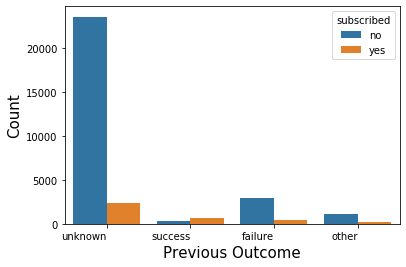

In [60]:
#poutcome vs subscribed
sns.countplot(x ='poutcome', hue = 'subscribed', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Previous Outcome', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

#66% of subscribers were not contacted previously.
#83% of subscribers were either not contacted previously or were subscribers already.
#12% of subscribers were not subscribers previously, but now they have subscribed.

In [61]:
df_train_dummies = pd.get_dummies(df_train[['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome', 'week']], drop_first = True)
df_train_label = df_train[['education', 'month']].apply(LabelEncoder().fit_transform)
df_test_dummies = pd.get_dummies(df_test[['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome', 'week']], drop_first = True)
df_test_label = df_test[['education', 'month']].apply(LabelEncoder().fit_transform)

In [62]:
df_train = pd.concat([df_train.drop(['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome', 'education', 'month', 'week'], axis = 1), df_train_dummies, df_train_label], axis = 1)
df_test = pd.concat([df_test.drop(['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome', 'education', 'month', 'week'], axis = 1), df_test_dummies, df_test_label], axis = 1)

In [63]:
#dropping ID
df_train = df_train.drop(['ID', 'age_group', 'balance_group', 'duration_group', 'campaign_group', 'pdays_group', 'previous_groups'], axis = 1)
df_test = df_test.drop(['ID', 'age_group', 'balance_group', 'duration_group', 'campaign_group', 'pdays_group', 'previous_groups'], axis = 1)

In [64]:
df_train['subscribed'] = df_train['subscribed'].map({'yes': 1, 'no': 0})

In [65]:
df_train_scaled = pd.DataFrame(StandardScaler().fit_transform(df_train.drop('subscribed', axis = 1)), columns = df_test.columns)
df_test_scaled = pd.DataFrame(StandardScaler().fit_transform(df_test), columns = df_test.columns)

In [1]:
pca_columns = []
for i in range(df_train_scaled.shape[1]):
    pca_columns.append('PC' + str(i+1))
pca_model = PCA()
pca_model.fit(df_train_scaled)
df_pca_train = pd.DataFrame(pca_model.transform(df_train_scaled), columns = pca_columns)
explained_info_train = pd.DataFrame(pca_model.explained_variance_ratio_, columns=['Explained Info']).sort_values(by = 'Explained Info', ascending = False)
#imp = []
#for i in range(explained_info_train.shape[0]):
    #imp.append(explained_info_train.head(i).sum())
#explained_info_train_sum = pd.DataFrame()
#explained_info_train_sum['Variable'] = pca_columns
#explained_info_train_sum['Importance'] = imp
#explained_info_train_sum

NameError: name 'df_train_scaled' is not defined

In [67]:
pca_columns = []
for i in range(19):
    pca_columns.append('PC' + str(i+1))
pca_model = PCA(n_components = 19)
pca_model.fit(df_train_scaled)
df_pca_train = pd.DataFrame(pca_model.transform(df_train_scaled), columns = pca_columns)

In [68]:
df_pca_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-0.535870,1.176935,2.218286,-0.302131,-0.385250,1.237341,1.228127,-1.798160,0.088595,0.695858,0.162531,0.532743,-0.330392,-0.148529,-0.020997,-0.034315,2.662521,0.830958,0.202232
1,-0.948603,0.424437,1.538101,0.258456,0.178352,0.801086,0.453676,-0.681110,-1.196111,4.564567,-3.821293,4.387787,5.562263,5.546928,2.551362,3.964409,-0.804707,0.134425,-1.947089
2,-0.676811,-0.024696,-0.851427,-0.267543,0.256728,-0.741391,1.258166,1.020631,-2.648489,-0.815038,0.617484,0.369374,0.171860,-0.470876,0.889376,0.189420,-0.090897,0.607370,0.360497
3,4.513359,0.125912,2.123064,-1.407571,-2.416932,-0.076965,-1.106290,0.602629,-0.060533,-0.118519,-0.135124,-2.973979,-0.464788,0.475950,2.705605,1.193683,0.016861,-0.586278,-0.041510
4,-0.554724,-0.070207,-0.192195,0.308712,0.442281,-2.154400,-1.867121,0.528750,-0.487427,-0.161859,-0.143332,1.038674,0.664606,-0.365580,-0.350311,-0.798041,0.600028,0.311650,0.064088


In [69]:
pca_model = PCA(n_components = 19)
pca_model.fit(df_test_scaled)
df_pca_test = pd.DataFrame(pca_model.transform(df_test_scaled), columns = pca_columns)

In [70]:
X = df_pca_train
y = df_train['subscribed']
X_test = df_pca_test

In [71]:
df_train['subscribed'].value_counts()

0    27932
1     3715
Name: subscribed, dtype: int64

In [72]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

In [73]:
y_smote.value_counts()

1    27932
0    27932
Name: subscribed, dtype: int64

In [74]:
X_train, X_val, y_train, y_val = train_test_split(X_smote, y_smote, test_size = 0.3, random_state = 17)

In [75]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((39104, 19), (16760, 19), (39104,), (16760,), (13564, 19))

In [76]:
X_train_sm = sm.add_constant(X_train)
lg = sm.Logit(y_train,X_train_sm)
lg = lg.fit()
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.432059
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             subscribed   No. Observations:                39104
Model:                          Logit   Df Residuals:                    39084
Method:                           MLE   Df Model:                           19
Date:                Thu, 01 Oct 2020   Pseudo R-squ.:                  0.3767
Time:                        20:12:19   Log-Likelihood:                -16895.
converged:                       True   LL-Null:                       -27105.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1244      0.018    -62.147      0.000      -1.160      -1.089
PC1            0.4308      0.

In [81]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), SVC(), XGBClassifier()]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'SVC', 'XGBClassifier']
accuracy_train = []
accuracy_val = []
for model in models:
    mod = model
    mod.fit(X_train, y_train)
    y_pred_train = mod.predict(X_train)
    y_pred_val = mod.predict(X_val)
    accuracy_train.append(accuracy_score(y_train, y_pred_train))
    accuracy_val.append(accuracy_score(y_val, y_pred_val))
data = {'Modelling Algorithm' : model_names, 'Train Accuracy' : accuracy_train, 'Validation Accuracy' : accuracy_val}
data = pd.DataFrame(data)
data['Difference'] = ((np.abs(data['Train Accuracy'] - data['Validation Accuracy'])) * 100)/(data['Train Accuracy'])
data.sort_values(by = 'Difference')

,Modelling Algorithm,Train Accuracy,Validation Accuracy,Difference
0,LogisticRegression,0.803064,0.796897,0.767841
3,AdaBoostClassifier,0.804189,0.796539,0.951201
6,SVC,0.859989,0.850179,1.140684
4,GradientBoostingClassifier,0.833904,0.823210,1.282453
5,KNeighborsClassifier,0.927169,0.895764,3.387178
7,XGBClassifier,0.945376,0.886695,6.207255
2,RandomForestClassifier,1.000000,0.923449,7.655131
1,DecisionTreeClassifier,1.000000,0.862649,13.735084


In [87]:
lr = LogisticRegression()
possible_parameter_values = {'C' : [0.7, 0.8, 0.9]}
lr_grid_search_cv = GridSearchCV(estimator = lr, param_grid = possible_parameter_values, cv = 10, scoring = 'accuracy')
lr_grid_search_cv.fit(X_train, y_train)
lr_grid_search_cv.best_params_

{'C': 0.8}

In [88]:
lr = LogisticRegression(C = 0.8)
lr.fit(X_train, y_train)
y_pred_val = lr.predict(X_val)

In [89]:
y_pred_val

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [90]:
accuracy_score(y_val, y_pred_val)

0.7968973747016707

In [91]:
lr = LogisticRegression(C = 0.8)
lr.fit(X_train, y_train)
y_pred_test = lr.predict(X_test)

In [92]:
y_pred_test = pd.DataFrame(y_pred_test, columns = ['Prediction'])

In [93]:
y_pred_test

,Prediction
0,0
1,1
2,1
3,0
4,0
...,...
13559,0
13560,0
13561,0
13562,1


In [94]:
y_pred_test.to_csv('Prediction.csv')

In [95]:
pca_columns = []
for i in range(19):
    pca_columns.append('PC' + str(i+1))
org_var = pd.DataFrame(pca_model.components_, index = pca_columns, columns = df_train_scaled.columns)
values = []
for i in org_var.columns:
    values.append(org_var[i].sum())
dep_var = pd.DataFrame()
dep_var['Variables'] = df_train_scaled.columns
dep_var['Values'] = values
dep_var.sort_values(by = 'Values', ascending = False)

,Variables,Values
20,default_yes,2.315854
17,job_unknown,1.337913
16,job_unemployed,1.111537
3,campaign,1.018696
23,contact_telephone,1.006686
14,job_student,0.647728
5,previous,0.588770
18,marital_married,0.569948
26,poutcome_success,0.555900
1,balance,0.538946
